# Linear Regression (Multiple features)
We are going to use gradient descent and a learning rate to find the coefficients based on their partial derivative of the cost function.

The mental map goes like this: recall the cost function for a simple case (one X and one B), now there is multiple x's and multiple b's. Hence, we have to differentiate properly find the rate of change of the coefficients for each feature and instead of using the closed form to find the minimum, we will use the gradient desceng: b = old b - learning rate * rate of change of b

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#plt.scatter(data.radio, data.sales)

In [4]:
# m, and b come from y = mx + b;
# points is the pandas' entries
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        # iloc used to loop row by row, 
        # doing points[i] would search for a column 
        # with name i
        x = points.iloc[i].radio
        y = points.iloc[i].sales
        total_error += (y-(m*x + b)) ** 2
    total_error/float(len(points))

What I thought the implementation should look like with gradient descent:

In [5]:
# Do it for one feature first, when do we stop?
# We either stop when we are within a tolerance range
# Or when we iterated a lot of time already max_iters aka epochs
# def gradient_descent(m_now, b_now, learning_rate, points, max_iters=10000, tolerance=1e-6):
#     for i in range(max_iters):
#         m_gradient = calculate_gradient(points, axis=0)
#         b_gradient = calculate_gradient(points, axis=1)
        
#         m_now -= learning_rate * m_gradient[feature_ptr]
        
#         if  m_now <= tolerance  and b_now <= tolerance:
#             break
#         elif m_now > tolerance and b_now > tolerance:
#             m_now -= learning_rate * m_gradient[featuire_ptr]
#             b_now -= learning_rate * b_gradient[featuire_ptr]
#         elif m_now > tolerance and b_now <= tolerance:
#             m_now -= learning_rate * m_gradient[featuire_ptr]
#         elif m_now <= tolerance and b_now > tolerance:
#             b_now -= learning_rate * b_gradient[featuire_ptr]
#         else:
#             break

What the actual gradient descent implementation looks like for one feature (simple linear regression for one feature)

Epoch: 0, m: 0, b: 0
Epoch: 50, m: 0.08323873042694489, b: 0.0022036485248894382
Epoch: 100, m: 0.08322968888223228, b: 0.0039840928810674185
Epoch: 150, m: 0.08322064962728844, b: 0.0057640863401898675
Epoch: 200, m: 0.08321161266153349, b: 0.007543629016446337
Epoch: 250, m: 0.08320257798438768, b: 0.009322721023997472
Epoch: 300, m: 0.08319354559527144, b: 0.011101362476974994
Epoch: 350, m: 0.08318451549360531, b: 0.012879553489481737
Epoch: 400, m: 0.08317548767881001, b: 0.01465729417559162
Epoch: 450, m: 0.0831664621503064, b: 0.016434584649349694
Epoch: 500, m: 0.08315743890751545, b: 0.0182114250247721
Epoch: 550, m: 0.08314841794985832, b: 0.01998781541584613
Epoch: 600, m: 0.0831393992767563, b: 0.021763755936530203
Epoch: 650, m: 0.08313038288763082, b: 0.023539246700753882
Epoch: 700, m: 0.08312136878190346, b: 0.025314287822417837
Epoch: 750, m: 0.08311235695899595, b: 0.02708887941539397
Epoch: 800, m: 0.0831033474183302, b: 0.02886302159352529
Epoch: 850, m: 0.083094340

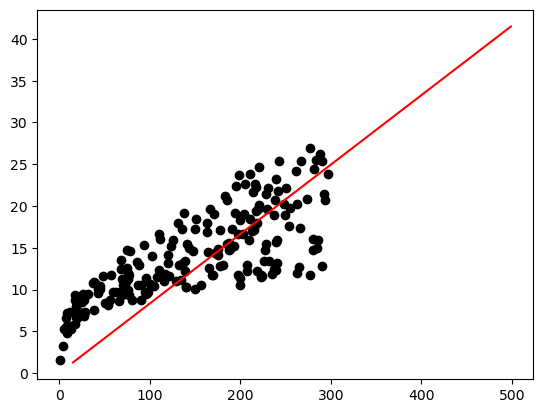

: 

In [ ]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].TV
        y = points.iloc[i].sales
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m,b        

m = 0
b = 0
L = 0.00001
epochs = 1000

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}, m: {m}, b: {b}")
    m, b = gradient_descent(m, b, data, L)
    
print (m, b)
plt.scatter(data.TV, data.sales, color = "black")
plt.plot(list(range(15, 500)), [m*x + b for x in range(15, 500)], color="red")
plt.show()